In [16]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def read_csv_to_dataframe(csv_file):
    data_list = []

    with open(csv_file, mode='r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data_list.append(row)

    return pd.DataFrame(data_list)

In [18]:
df = read_csv_to_dataframe('../data/saveecobot_15705.csv')

In [19]:
df = df.drop(columns=['value_text', None])

In [20]:
df['logged_at'] = pd.to_datetime(df['logged_at'], format='mixed', errors='coerce')

In [21]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [22]:
df = df.pivot_table(index='logged_at', columns='phenomenon', values='value', aggfunc='mean')
df.reset_index(inplace=True)

In [24]:
df = df.drop(columns=['temperature', 'humidity', 'signal', 'max_micro', 'min_micro'])

In [26]:
df = df.set_index(pd.DatetimeIndex(df['logged_at']))

In [28]:
df = df.drop(columns=['logged_at'])

In [29]:
df

phenomenon,heca_humidity,heca_temperature,pm10,pm25,pressure_pa
logged_at,,,,,
2021-01-09 19:49:40,48.72,20.19,23.77,13.15,993693.8
2021-02-09 15:09:09,20.43,27.65,9.28,5.65,986210.1
2021-02-09 15:11:38,21.80,25.71,11.00,7.33,986345.9
2021-02-09 15:14:06,23.10,24.04,9.10,6.78,986322.0
2021-02-09 15:16:34,24.35,22.66,9.43,6.55,986382.0
...,...,...,...,...,...
2023-09-11 16:15:24,45.72,22.09,5.50,3.00,999744.0
2023-09-11 16:17:51,45.52,22.09,4.50,2.60,999715.7
2023-09-11 16:20:18,45.77,22.09,5.60,2.80,999694.8


In [30]:
df.dtypes

phenomenon
heca_humidity       float64
heca_temperature    float64
pm10                float64
pm25                float64
pressure_pa         float64
dtype: object

In [32]:
df.describe()

phenomenon,heca_humidity,heca_temperature,pm10,pm25,pressure_pa
count,447054.000000,447054.000000,443456.000000,443453.000000,4.470110e+05
mean,52.657573,15.779831,12.069420,6.413249,9.978842e+05
std,11.520865,8.888640,11.587987,6.251444,7.721361e+03
min,13.650000,-10.210000,0.080000,0.000000,9.645142e+05
25%,44.790000,7.590000,5.200000,2.470000,9.929536e+05
50%,56.620000,15.180000,8.500000,4.600000,9.974117e+05
75%,60.980000,23.460000,14.700000,8.330000,1.002371e+06
max,97.170000,40.740000,577.550000,516.670000,1.026403e+06


<Axes: xlabel='logged_at'>

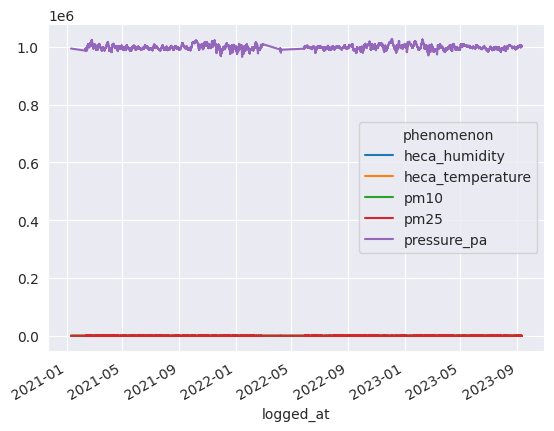

In [33]:
df.plot()

In [37]:
numeric_columns = ['heca_humidity', 'heca_temperature', 'pm10', 'pm25', 'pressure_pa']

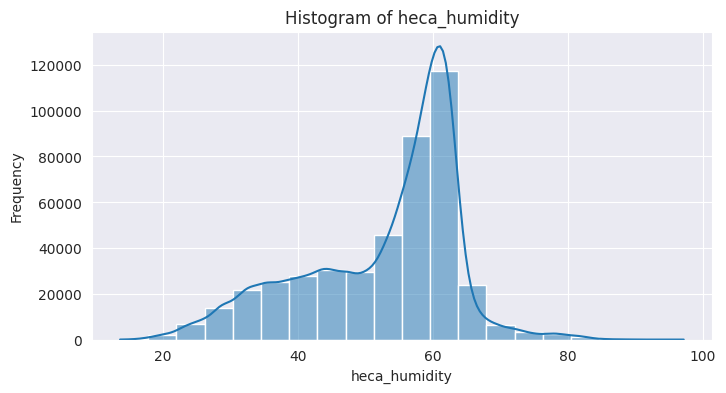

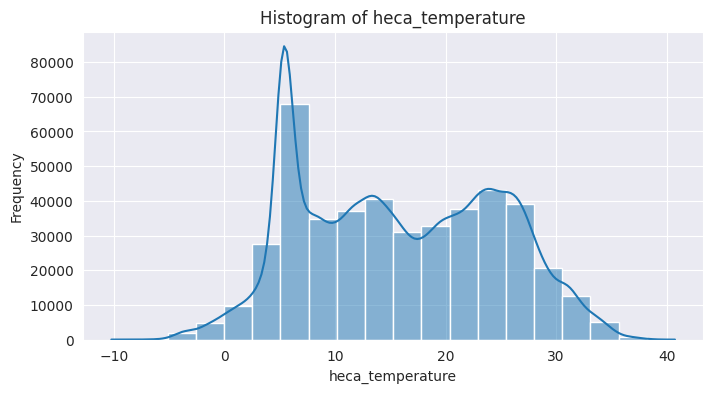

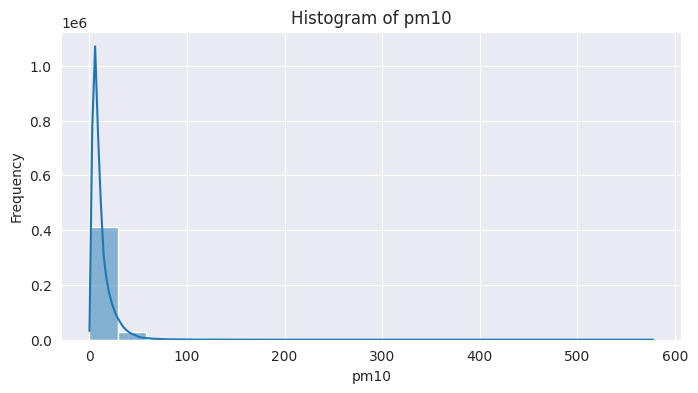

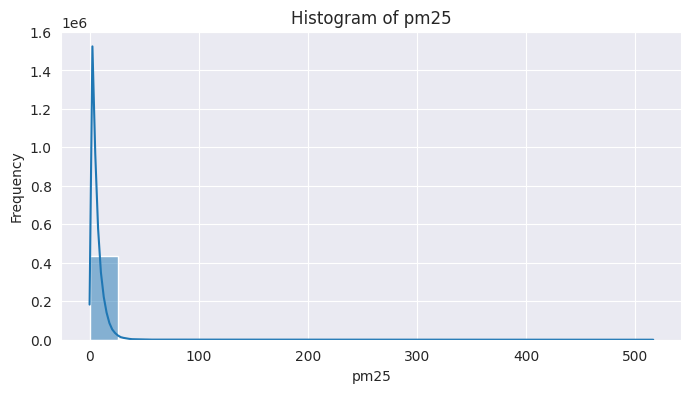

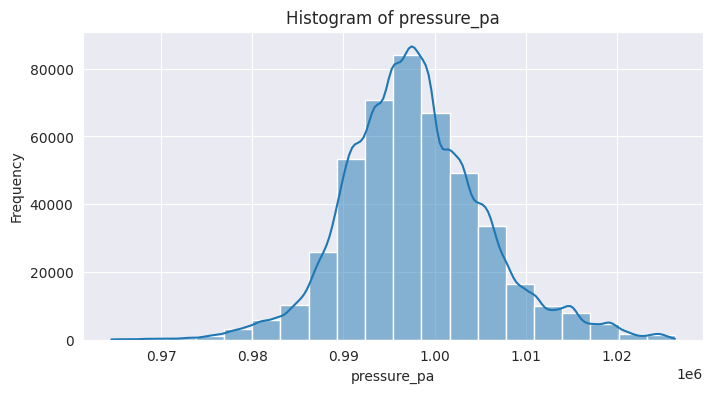

In [38]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

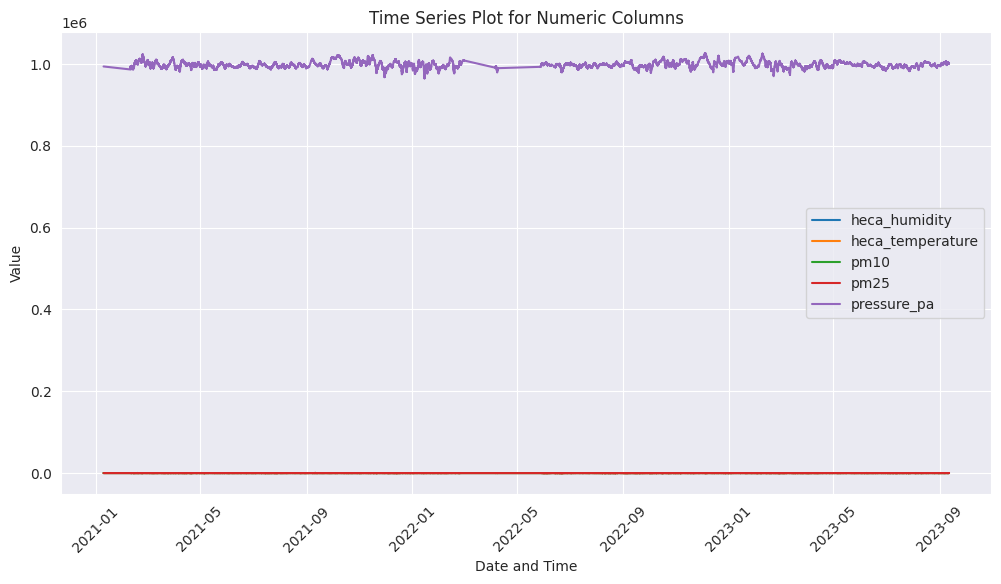

In [40]:
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Time Series Plot for Numeric Columns')
plt.legend()
plt.xticks(rotation=45)
plt.show()

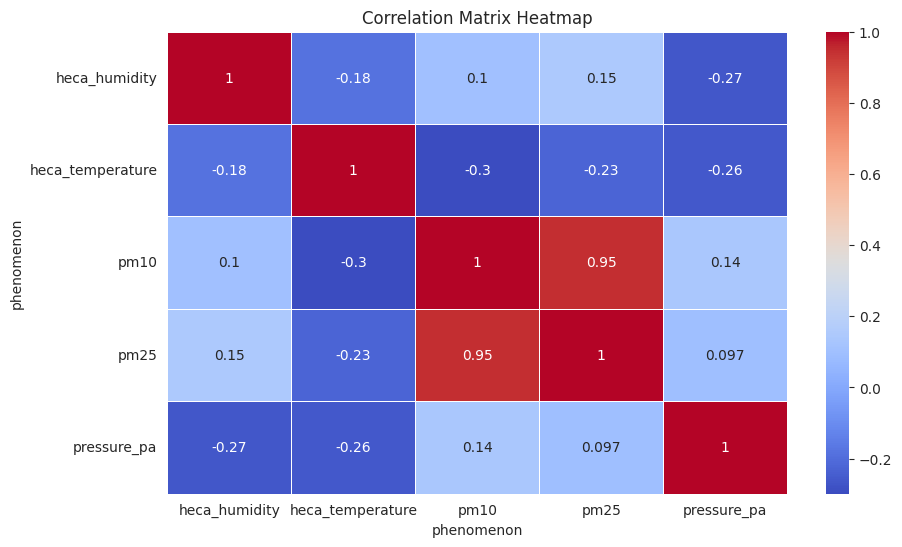

In [42]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

/home/mykyta/miniconda3/envs/py309/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


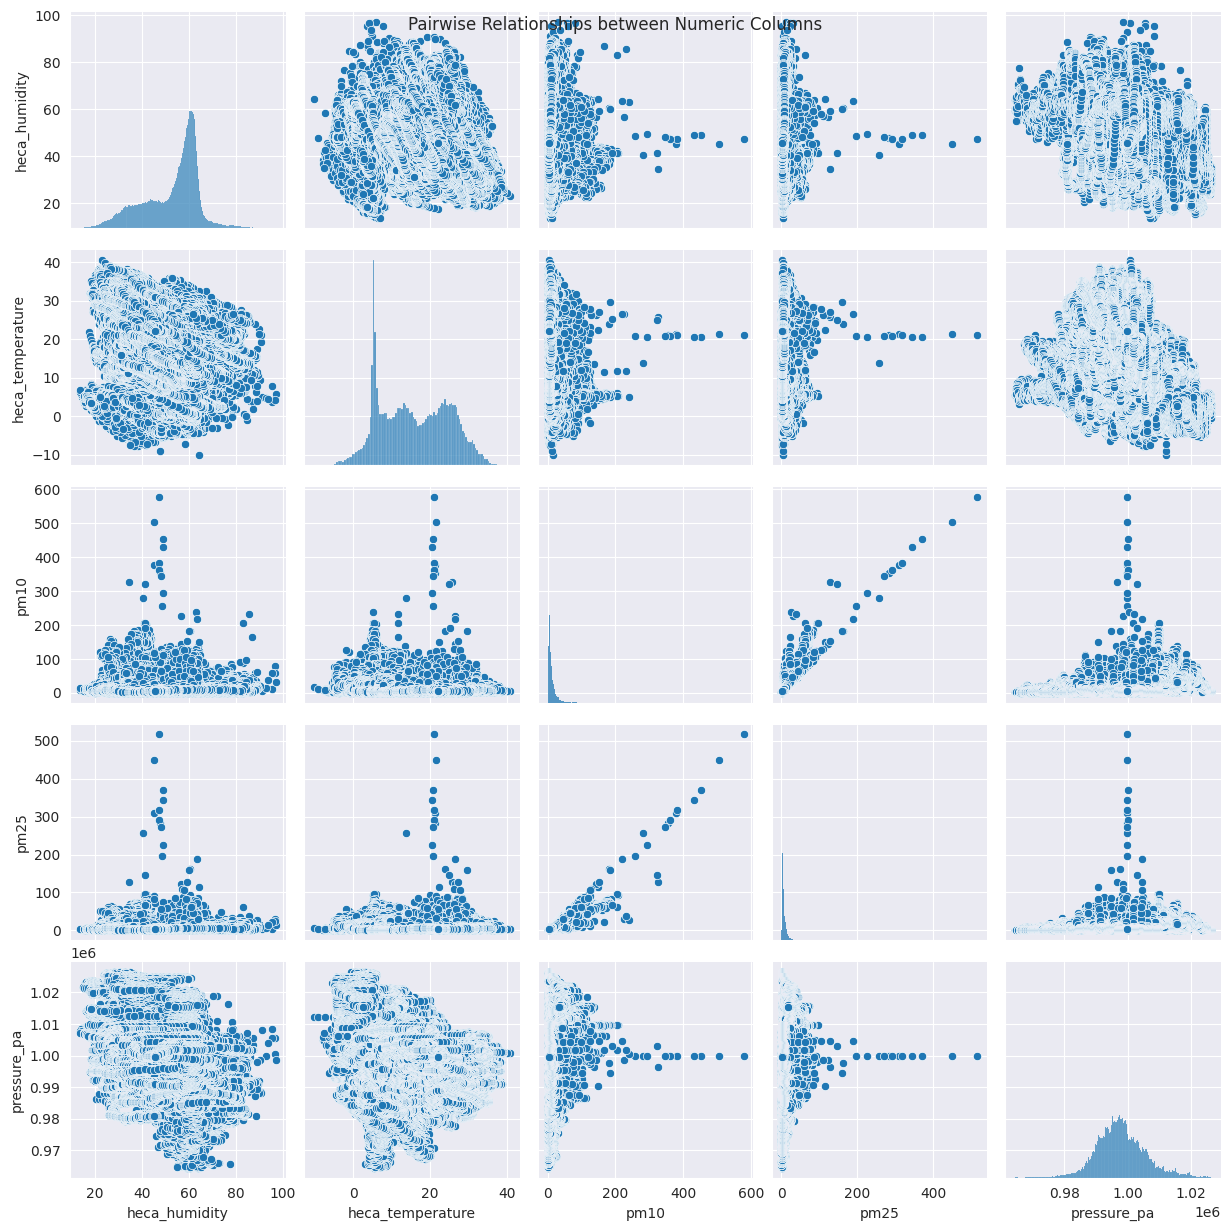

In [43]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairwise Relationships between Numeric Columns')
plt.show()

/tmp/ipykernel_1026/1267715621.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['heca_temperature'], shade=True)


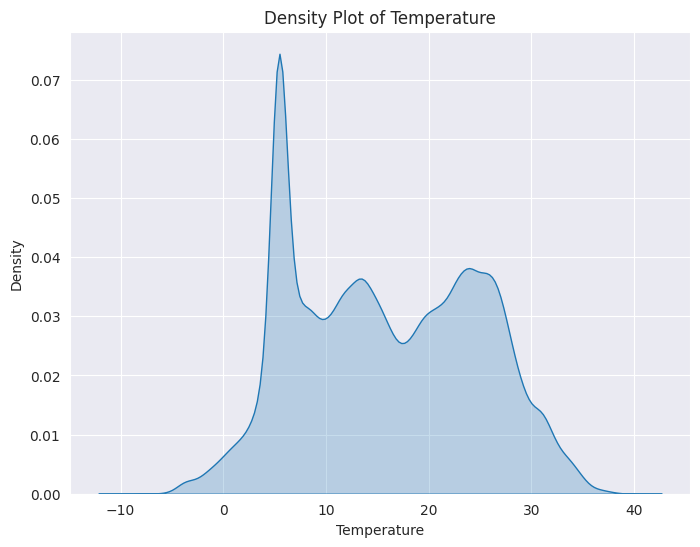

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['heca_temperature'], shade=True)
plt.title('Density Plot of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

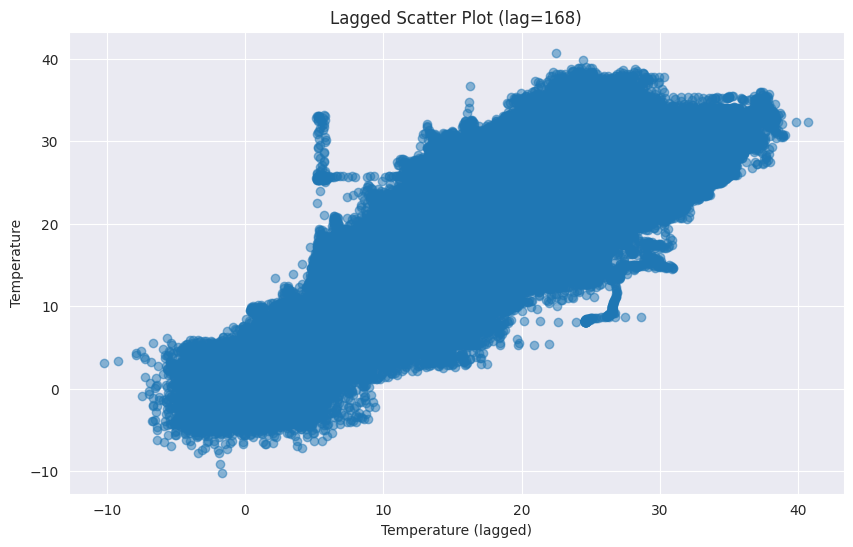

In [49]:
lag = 168  # Change the lag as needed
plt.figure(figsize=(10, 6))
plt.scatter(df['heca_temperature'].shift(lag), df['heca_temperature'], alpha=0.5)
plt.title(f'Lagged Scatter Plot (lag={lag})')
plt.xlabel('Temperature (lagged)')
plt.ylabel('Temperature')
plt.show()